In this notebook I will take a look at the jamendo mtg dataset, more specifically, the subset of it that I found the most sutable for this project.   
I am going to import it, transform it (from tsv format, make some joints of metadata, make desicions on the data quality, etc.) and visualize it a little. 

- python env -- 'main'

In [3]:
import pandas as pd

In [4]:
all_metadata = pd.read_csv("raw_30s_cleantags_50artists.tsv", delimiter="\t", 
                          names=['TRACK_ID', 'ARTIST_ID', 'ALBUM_ID', 'PATH', 'DURATION', 'TAG_1', 'TAG_2', 'TAG_3', 'TAG_4', 'TAG_5', 'TAG_6', 'TAG_7', 'TAG_8', 'TAG_9',
                                 'TAG_10', 'TAG_11', 'TAG_12', 'TAG_13', 'TAG_14', 'TAG_15', 'TAG_16', 'TAG_17', 'TAG_18', 
                                 'TAG_19', 'TAG_20', 'TAG_21', 'TAG_22', 'TAG_23', 'TAG_24', 'TAG_25', 'TAG_26', 'TAG_27'
                                 'TAG_28', 'TAG_29', 'TAG_30' 'TAG_31', 'TAG_32', 'TAG_33', 'TAG_34', 'TAG_35', 'TAG_36',
                                 'TAG_37', 'TAG_38', 'TAG_39', 'TAG_40', 'TAG_41', 'TAG_42', 'TAG_43', 'TAG_44', 'TAG_45', 'TAG_46',
                                 'TAG_47', 'TAG_48', 'TAG_49', 'TAG_50', 'TAG_51', 'TAG_52', 'TAG_53', 'TAG_54', 'TAG_55',])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19564\2880550403.py:1: DtypeWarning: Columns (4,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  all_metadata = pd.read_csv("raw_30s_cleantags_50artists.tsv", delimiter="\t",


In [5]:
all_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55610 entries, 0 to 55609
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRACK_ID      55610 non-null  object 
 1   ARTIST_ID     55610 non-null  object 
 2   ALBUM_ID      55610 non-null  object 
 3   PATH          55610 non-null  object 
 4   DURATION      55610 non-null  object 
 5   TAG_1         55610 non-null  object 
 6   TAG_2         49400 non-null  object 
 7   TAG_3         39829 non-null  object 
 8   TAG_4         28976 non-null  object 
 9   TAG_5         20067 non-null  object 
 10  TAG_6         12955 non-null  object 
 11  TAG_7         8591 non-null   object 
 12  TAG_8         5313 non-null   object 
 13  TAG_9         3327 non-null   object 
 14  TAG_10        2059 non-null   object 
 15  TAG_11        1267 non-null   object 
 16  TAG_12        872 non-null    object 
 17  TAG_13        597 non-null    object 
 18  TAG_14        495 non-null

In [6]:
to_drop = all_metadata.columns[all_metadata.count() < 5000]

In [7]:
all_metadata = all_metadata.drop(columns=to_drop)

In [8]:
all_metadata.drop(axis=0, index=0, inplace=True)

In [9]:
all_metadata.head()

,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,TAG_1,TAG_2,TAG_3,TAG_4,TAG_5,TAG_6,TAG_7,TAG_8
1,track_0000214,artist_000014,album_000031,14/214.mp3,124.6,genre---punkrock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,track_0000215,artist_000014,album_000031,15/215.mp3,151.4,genre---metal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,track_0000216,artist_000014,album_000031,16/216.mp3,234.9,genre---metal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,track_0000217,artist_000014,album_000031,17/217.mp3,127.9,genre---punkrock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,track_0000218,artist_000014,album_000031,18/218.mp3,180.7,genre---punkrock,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(all_metadata)

55609

In [11]:
for col in all_metadata.columns[5:]:
    print(f'In the column: {col} there are {sum(all_metadata[col].isna())} "NULL" values')

In the column: TAG_1 there are 0 "NULL" values
In the column: TAG_2 there are 6209 "NULL" values
In the column: TAG_3 there are 15780 "NULL" values
In the column: TAG_4 there are 26633 "NULL" values
In the column: TAG_5 there are 35542 "NULL" values
In the column: TAG_6 there are 42654 "NULL" values
In the column: TAG_7 there are 47018 "NULL" values
In the column: TAG_8 there are 50296 "NULL" values


Won't drop, want to add tags on my own.

In [12]:
import os

to_drop = []

for i, path in enumerate(all_metadata["PATH"]):
    if not os.path.isfile(path):
        to_drop.append(i)

print(f"Missing files for {len(to_drop)} rows.")
print("Example missing paths (up to 10):", all_metadata.iloc[to_drop]["PATH"].head(10).tolist())

Missing files for 37123 rows.
Example missing paths (up to 10): ['14/214.mp3', '15/215.mp3', '16/216.mp3', '17/217.mp3', '18/218.mp3', '19/219.mp3', '20/220.mp3', '21/221.mp3', '22/222.mp3', '23/223.mp3']


In [13]:
dataset_paths = set(all_metadata["PATH"].tolist())

# Collect all actual mp3 files in all subfolders 0 to 99
local_files = []
for subdir in map(str, range(100)):  # folders from '0' to '99'
    folder_path = os.path.join(subdir)
    if not os.path.isdir(folder_path):
        continue
    for file in os.listdir(folder_path):
        if file.endswith(".mp3"):
            local_files.append(os.path.join(subdir, file))

local_files_set = set(local_files)

# Find extra files on disk not referenced in dataset
extra_files = local_files_set - dataset_paths

print(f"\nFound {len(extra_files)} local mp3 files not referenced in dataset.")
print("Example extra files (up to 10):", list(extra_files)[:10])


Found 16495 local mp3 files not referenced in dataset.
Example extra files (up to 10): ['29\\1256729.mp3', '94\\506094.mp3', '47\\1251847.mp3', '27\\1149227.mp3', '53\\1405353.mp3', '31\\1320031.mp3', '48\\1221848.mp3', '62\\1413262.mp3', '12\\665112.mp3', '49\\1353449.mp3']


In [14]:
mt_metadata = pd.read_csv('autotagging_moodtheme.tsv', delimiter="\t", 
                          names=['TRACK_ID', 'ARTIST_ID', 'ALBUM_ID', 'PATH', 'DURATION', 'TAG_1', 'TAG_2', 'TAG_3', 'TAG_4', 'TAG_5', 'TAG_6', 'TAG_7', 'TAG_8', 'TAG_9',
                                 'TAG_10', 'TAG_11', 'TAG_12', 'TAG_13', 'TAG_14', 'TAG_15', 'TAG_16', 'TAG_17', 'TAG_18', 
                                 'TAG_19', 'TAG_20', 'TAG_21', 'TAG_22', 'TAG_23', 'TAG_24', 'TAG_25', 'TAG_26', 'TAG_27'
                                 'TAG_28', 'TAG_29', 'TAG_30' 'TAG_31', 'TAG_32', 'TAG_33', 'TAG_34', 'TAG_35', 'TAG_36',
                                 'TAG_37', 'TAG_38', 'TAG_39', 'TAG_40', 'TAG_41', 'TAG_42', 'TAG_43', 'TAG_44', 'TAG_45', 'TAG_46',
                                 'TAG_47', 'TAG_48', 'TAG_49', 'TAG_50', 'TAG_51', 'TAG_52', 'TAG_53', 'TAG_54', 'TAG_55',])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19564\3642036579.py:1: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  mt_metadata = pd.read_csv('autotagging_moodtheme.tsv', delimiter="\t",


In [15]:
to_drop = []

for i, path in enumerate(mt_metadata["PATH"]):
    if not os.path.isfile(path):
        to_drop.append(i)

print(f"Missing files for {len(to_drop)} rows.")
print("Example missing paths (up to 10):", mt_metadata.iloc[to_drop]["PATH"].head(10).tolist())

Missing files for 1 rows.
Example missing paths (up to 10): ['PATH']


In [16]:
# Normalize dataset paths
dataset_paths = set(mt_metadata["PATH"].str.replace("\\", "/"))

# Collect all actual mp3 files in folders '00' to '99'
local_files = []
for subdir in [f"{i:02}" for i in range(100)]:
    folder_path = os.path.join(subdir)
    if not os.path.isdir(folder_path):
        continue
    for file in os.listdir(folder_path):
        if file.endswith(".mp3"):
            rel_path = os.path.join(subdir, file).replace("\\", "/")
            local_files.append(rel_path)

local_files_set = set(local_files)

# Compare sets
extra_files = local_files_set - dataset_paths

print(f"Found {len(local_files_set)} unique local mp3 files.")
print(f"Dataset refers to {len(dataset_paths)} files.")
print(f"Extra local files NOT in dataset: {len(extra_files)}")
print("Example extra files:", list(extra_files)[:10])

Found 18486 unique local mp3 files.
Dataset refers to 18487 files.
Extra local files NOT in dataset: 0
Example extra files: []


In [17]:
for col in mt_metadata.columns[5:]:
    print(f'In the column: {col} there are {sum(mt_metadata[col].isna())} "NULL" values')

In the column: TAG_1 there are 0 "NULL" values
In the column: TAG_2 there are 9948 "NULL" values
In the column: TAG_3 there are 15066 "NULL" values
In the column: TAG_4 there are 17062 "NULL" values
In the column: TAG_5 there are 18003 "NULL" values
In the column: TAG_6 there are 18341 "NULL" values
In the column: TAG_7 there are 18464 "NULL" values
In the column: TAG_8 there are 18484 "NULL" values
In the column: TAG_9 there are 18487 "NULL" values
In the column: TAG_10 there are 18487 "NULL" values
In the column: TAG_11 there are 18487 "NULL" values
In the column: TAG_12 there are 18487 "NULL" values
In the column: TAG_13 there are 18487 "NULL" values
In the column: TAG_14 there are 18487 "NULL" values
In the column: TAG_15 there are 18487 "NULL" values
In the column: TAG_16 there are 18487 "NULL" values
In the column: TAG_17 there are 18487 "NULL" values
In the column: TAG_18 there are 18487 "NULL" values
In the column: TAG_19 there are 18487 "NULL" values
In the column: TAG_20 ther

In [18]:
start_col = mt_metadata.columns.get_loc('TAG_7')

# Drop all columns after 'TAG_7'
df = mt_metadata.iloc[:, :start_col + 1]

In [19]:
df.drop(axis=0, index=0, inplace=True)
df.head()

,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,TAG_1,TAG_2,TAG_3,TAG_4,TAG_5,TAG_6,TAG_7
1,track_0000948,artist_000087,album_000149,48/948.mp3,212.7,mood/theme---background,NaN,NaN,NaN,NaN,NaN,NaN
2,track_0000950,artist_000087,album_000149,50/950.mp3,248.0,mood/theme---background,NaN,NaN,NaN,NaN,NaN,NaN
3,track_0000951,artist_000087,album_000149,51/951.mp3,199.7,mood/theme---background,NaN,NaN,NaN,NaN,NaN,NaN
4,track_0002165,artist_000326,album_000347,65/2165.mp3,229.0,mood/theme---film,NaN,NaN,NaN,NaN,NaN,NaN
5,track_0002263,artist_000320,album_000366,63/2263.mp3,494.7,mood/theme---melancholic,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Select all TAG_* columns
tag_cols = [col for col in df.columns if col.startswith("TAG_")]

# Remove 'mood/theme---' prefix from all TAG_* columns
df[tag_cols] = df[tag_cols].applymap(lambda x: x.replace("mood/theme---", "") if isinstance(x, str) else x)

# Combine all tags into a list (ignore NaNs or empty values)
df["Mood/Theme_TAG"] = df[tag_cols].values.tolist()
df["Mood/Theme_TAG"] = df["Mood/Theme_TAG"].apply(lambda tags: [tag for tag in tags if isinstance(tag, str)])

df = df.drop(columns=tag_cols)
df.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19564\3313620249.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[tag_cols] = df[tag_cols].applymap(lambda x: x.replace("mood/theme---", "") if isinstance(x, str) else x)


,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,Mood/Theme_TAG
1,track_0000948,artist_000087,album_000149,48/948.mp3,212.7,[background]
2,track_0000950,artist_000087,album_000149,50/950.mp3,248.0,[background]
3,track_0000951,artist_000087,album_000149,51/951.mp3,199.7,[background]
4,track_0002165,artist_000326,album_000347,65/2165.mp3,229.0,[film]
5,track_0002263,artist_000320,album_000366,63/2263.mp3,494.7,[melancholic]


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Mood/Theme_TAG', ylabel='count'>

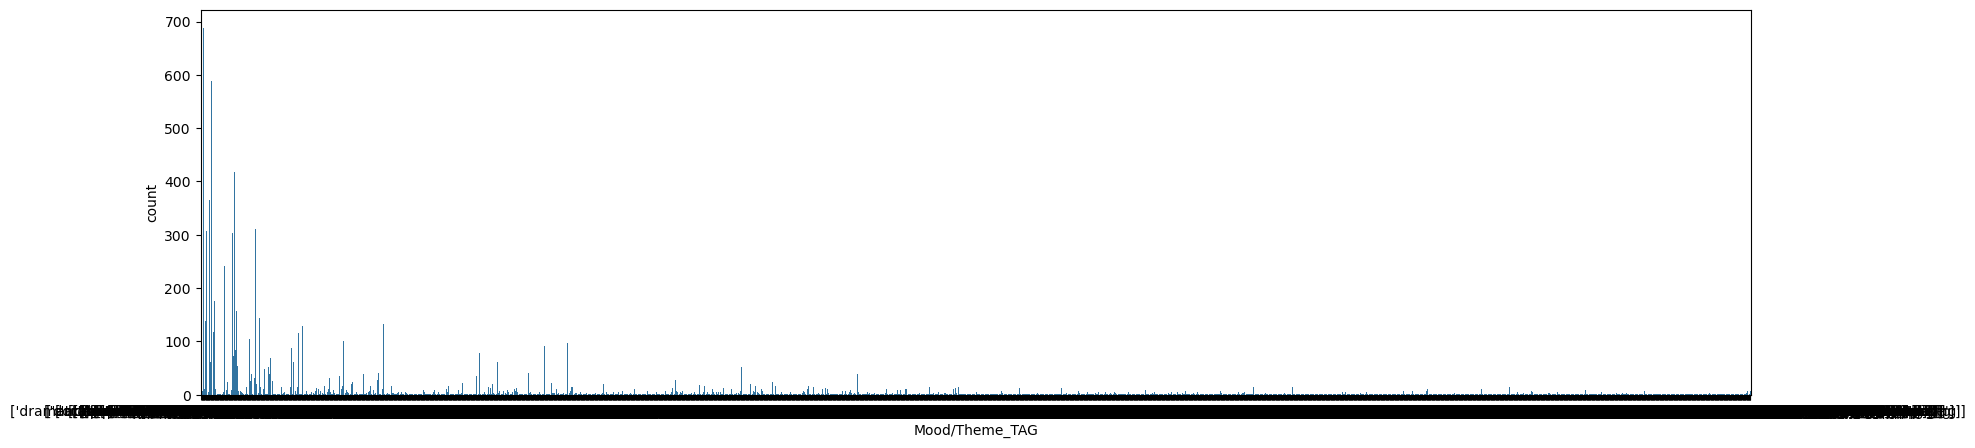

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['Mood/Theme_TAG'].apply(lambda x: str(x)))

In [23]:
genre_df = pd.read_csv('autotagging_genre.tsv', delimiter="\t", 
                          names=['TRACK_ID', 'ARTIST_ID', 'ALBUM_ID', 'PATH', 'DURATION', 'TAG_1', 'TAG_2', 'TAG_3', 'TAG_4', 'TAG_5', 'TAG_6', 'TAG_7', 'TAG_8', 'TAG_9',
                                 'TAG_10', 'TAG_11', 'TAG_12', 'TAG_13', 'TAG_14', 'TAG_15', 'TAG_16', 'TAG_17', 'TAG_18', 
                                 'TAG_19', 'TAG_20', 'TAG_21', 'TAG_22', 'TAG_23', 'TAG_24', 'TAG_25', 'TAG_26', 'TAG_27'
                                 'TAG_28', 'TAG_29', 'TAG_30' 'TAG_31', 'TAG_32', 'TAG_33', 'TAG_34', 'TAG_35', 'TAG_36',
                                 'TAG_37', 'TAG_38', 'TAG_39', 'TAG_40', 'TAG_41', 'TAG_42', 'TAG_43', 'TAG_44', 'TAG_45', 'TAG_46',
                                 'TAG_47', 'TAG_48', 'TAG_49', 'TAG_50', 'TAG_51', 'TAG_52', 'TAG_53', 'TAG_54', 'TAG_55',])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19564\3183036939.py:1: DtypeWarning: Columns (4,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  genre_df = pd.read_csv('autotagging_genre.tsv', delimiter="\t",


In [24]:
list_mood_ids = df['TRACK_ID'].to_list()
list_genre_ids = set(genre_df['TRACK_ID'])  # use set for O(1) lookup

count = sum(1 for item in list_mood_ids if item in list_genre_ids)

print(f"{count} out of {len(list_mood_ids)} mood track IDs are also in the genre dataset ({len(list_genre_ids)} total genre IDs).")

18255 out of 18486 mood track IDs are also in the genre dataset (55216 total genre IDs).


In [25]:
start_col = genre_df.columns.get_loc('TAG_7')

# Drop all columns after 'TAG_7'
genre_df = genre_df.iloc[:, :start_col + 1]

genre_df.drop(axis=0, index=0, inplace=True)
genre_df.head()

,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,TAG_1,TAG_2,TAG_3,TAG_4,TAG_5,TAG_6,TAG_7
1,track_0000214,artist_000014,album_000031,14/214.mp3,124.6,genre---punkrock,NaN,NaN,NaN,NaN,NaN,NaN
2,track_0000215,artist_000014,album_000031,15/215.mp3,151.4,genre---metal,NaN,NaN,NaN,NaN,NaN,NaN
3,track_0000216,artist_000014,album_000031,16/216.mp3,234.9,genre---metal,NaN,NaN,NaN,NaN,NaN,NaN
4,track_0000217,artist_000014,album_000031,17/217.mp3,127.9,genre---punkrock,NaN,NaN,NaN,NaN,NaN,NaN
5,track_0000218,artist_000014,album_000031,18/218.mp3,180.7,genre---punkrock,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Select all TAG_* columns
tag_cols = [col for col in genre_df.columns if col.startswith("TAG_")]

# Remove 'mood/theme---' prefix from all TAG_* columns
genre_df[tag_cols] = genre_df[tag_cols].applymap(lambda x: x.replace("genre---", "") if isinstance(x, str) else x)

# Combine all tags into a list (ignore NaNs or empty values)
genre_df["Genre_TAG"] = genre_df[tag_cols].values.tolist()
genre_df["Genre_TAG"] = genre_df["Genre_TAG"].apply(lambda tags: [tag for tag in tags if isinstance(tag, str)])

genre_df = genre_df.drop(columns=tag_cols)
genre_df.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19564\3408921017.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  genre_df[tag_cols] = genre_df[tag_cols].applymap(lambda x: x.replace("genre---", "") if isinstance(x, str) else x)


,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,Genre_TAG
1,track_0000214,artist_000014,album_000031,14/214.mp3,124.6,[punkrock]
2,track_0000215,artist_000014,album_000031,15/215.mp3,151.4,[metal]
3,track_0000216,artist_000014,album_000031,16/216.mp3,234.9,[metal]
4,track_0000217,artist_000014,album_000031,17/217.mp3,127.9,[punkrock]
5,track_0000218,artist_000014,album_000031,18/218.mp3,180.7,[punkrock]


In [27]:
df_mood_genre = pd.merge(df, genre_df[['TRACK_ID', 'Genre_TAG']], on='TRACK_ID', how='left')
df_mood_genre.head()

,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,Mood/Theme_TAG,Genre_TAG
0,track_0000948,artist_000087,album_000149,48/948.mp3,212.7,[background],"[chillout, downtempo, easylistening, electroni..."
1,track_0000950,artist_000087,album_000149,50/950.mp3,248.0,[background],"[chillout, easylistening, electronic, lounge, ..."
2,track_0000951,artist_000087,album_000149,51/951.mp3,199.7,[background],"[ambient, easylistening, electronic, lounge, t..."
3,track_0002165,artist_000326,album_000347,65/2165.mp3,229.0,[film],"[chillout, fusion, soundtrack]"
4,track_0002263,artist_000320,album_000366,63/2263.mp3,494.7,[melancholic],"[grunge, rock]"


In [28]:
df_mood_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18486 entries, 0 to 18485
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TRACK_ID        18486 non-null  object
 1   ARTIST_ID       18486 non-null  object
 2   ALBUM_ID        18486 non-null  object
 3   PATH            18486 non-null  object
 4   DURATION        18486 non-null  object
 5   Mood/Theme_TAG  18486 non-null  object
 6   Genre_TAG       18255 non-null  object
dtypes: object(7)
memory usage: 1011.1+ KB


In [29]:
total_files = 0

for subdir in [f"{i:02}" for i in range(100)]:
    folder_path = os.path.join(subdir)
    if not os.path.isdir(folder_path):
        continue
    # Count only .mp3 files
    mp3_files = [f for f in os.listdir(folder_path) if f.endswith(".mp3")]
    total_files += len(mp3_files)

print(f"Total .mp3 files downloaded across folders 00 to 99: {total_files}")


Total .mp3 files downloaded across folders 00 to 99: 18486


In [30]:
instrument_df = pd.read_csv('autotagging_instrument.tsv', delimiter="\t", 
                          names=['TRACK_ID', 'ARTIST_ID', 'ALBUM_ID', 'PATH', 'DURATION', 'TAG_1', 'TAG_2', 'TAG_3', 'TAG_4', 'TAG_5', 'TAG_6', 'TAG_7', 'TAG_8', 'TAG_9',
                                 'TAG_10', 'TAG_11', 'TAG_12', 'TAG_13', 'TAG_14', 'TAG_15', 'TAG_16', 'TAG_17', 'TAG_18', 
                                 'TAG_19', 'TAG_20', 'TAG_21', 'TAG_22', 'TAG_23', 'TAG_24', 'TAG_25', 'TAG_26', 'TAG_27'
                                 'TAG_28', 'TAG_29', 'TAG_30' 'TAG_31', 'TAG_32', 'TAG_33', 'TAG_34', 'TAG_35', 'TAG_36',
                                 'TAG_37', 'TAG_38', 'TAG_39', 'TAG_40', 'TAG_41', 'TAG_42', 'TAG_43', 'TAG_44', 'TAG_45', 'TAG_46',
                                 'TAG_47', 'TAG_48', 'TAG_49', 'TAG_50', 'TAG_51', 'TAG_52', 'TAG_53', 'TAG_54', 'TAG_55',])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19564\2689814466.py:1: DtypeWarning: Columns (4,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  instrument_df = pd.read_csv('autotagging_instrument.tsv', delimiter="\t",


In [31]:
list_mood_ids = df['TRACK_ID'].to_list()
list_instrument_ids = set(instrument_df['TRACK_ID'])  # use set for O(1) lookup

count = sum(1 for item in list_mood_ids if item in list_instrument_ids)

print(f"{count} out of {len(list_mood_ids)} mood track IDs are also in the instrument dataset ({len(list_instrument_ids)} total instrument IDs).")

10594 out of 18486 mood track IDs are also in the instrument dataset (25136 total instrument IDs).


In [32]:
start_col = instrument_df.columns.get_loc('TAG_7')

# Drop all columns after 'TAG_7'
instrument_df = instrument_df.iloc[:, :start_col + 1]

instrument_df.drop(axis=0, index=0, inplace=True)
instrument_df.head()

,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,TAG_1,TAG_2,TAG_3,TAG_4,TAG_5,TAG_6,TAG_7
1,track_0000382,artist_000020,album_000046,82/382.mp3,211.1,instrument---voice,NaN,NaN,NaN,NaN,NaN,NaN
2,track_0000383,artist_000020,album_000046,83/383.mp3,113.1,instrument---voice,NaN,NaN,NaN,NaN,NaN,NaN
3,track_0000384,artist_000020,album_000046,84/384.mp3,115.7,instrument---voice,NaN,NaN,NaN,NaN,NaN,NaN
4,track_0000386,artist_000020,album_000046,86/386.mp3,103.4,instrument---voice,NaN,NaN,NaN,NaN,NaN,NaN
5,track_0000387,artist_000020,album_000046,87/387.mp3,257.1,instrument---voice,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Select all TAG_* columns
tag_cols = [col for col in instrument_df.columns if col.startswith("TAG_")]

# Remove 'mood/theme---' prefix from all TAG_* columns
instrument_df[tag_cols] = instrument_df[tag_cols].applymap(lambda x: x.replace("instrument---", "") if isinstance(x, str) else x)

# Combine all tags into a list (ignore NaNs or empty values)
instrument_df["Instrument_TAG"] = instrument_df[tag_cols].values.tolist()
instrument_df["Instrument_TAG"] = instrument_df["Instrument_TAG"].apply(lambda tags: [tag for tag in tags if isinstance(tag, str)])

instrument_df = instrument_df.drop(columns=tag_cols)
instrument_df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19564\4286788648.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  instrument_df[tag_cols] = instrument_df[tag_cols].applymap(lambda x: x.replace("instrument---", "") if isinstance(x, str) else x)


,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,Instrument_TAG
1,track_0000382,artist_000020,album_000046,82/382.mp3,211.1,[voice]
2,track_0000383,artist_000020,album_000046,83/383.mp3,113.1,[voice]
3,track_0000384,artist_000020,album_000046,84/384.mp3,115.7,[voice]
4,track_0000386,artist_000020,album_000046,86/386.mp3,103.4,[voice]
5,track_0000387,artist_000020,album_000046,87/387.mp3,257.1,[voice]


In [34]:
df_mood_genre_instr = pd.merge(df_mood_genre, instrument_df[['TRACK_ID', 'Instrument_TAG']], on='TRACK_ID', how='left')
df_mood_genre_instr.head()

,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,Mood/Theme_TAG,Genre_TAG,Instrument_TAG
0,track_0000948,artist_000087,album_000149,48/948.mp3,212.7,[background],"[chillout, downtempo, easylistening, electroni...",[synthesizer]
1,track_0000950,artist_000087,album_000149,50/950.mp3,248.0,[background],"[chillout, easylistening, electronic, lounge, ...",[synthesizer]
2,track_0000951,artist_000087,album_000149,51/951.mp3,199.7,[background],"[ambient, easylistening, electronic, lounge, t...",[synthesizer]
3,track_0002165,artist_000326,album_000347,65/2165.mp3,229.0,[film],"[chillout, fusion, soundtrack]",NaN
4,track_0002263,artist_000320,album_000366,63/2263.mp3,494.7,[melancholic],"[grunge, rock]",NaN


In [35]:
df_mood_genre_instr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18486 entries, 0 to 18485
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TRACK_ID        18486 non-null  object
 1   ARTIST_ID       18486 non-null  object
 2   ALBUM_ID        18486 non-null  object
 3   PATH            18486 non-null  object
 4   DURATION        18486 non-null  object
 5   Mood/Theme_TAG  18486 non-null  object
 6   Genre_TAG       18255 non-null  object
 7   Instrument_TAG  10594 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


In [39]:
# save the dataset
df_mood_genre_instr.to_csv("main_df_1.csv", index=False)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast  # to parse stringified lists

In [37]:
df_mood_genre_instr.columns = df_mood_genre_instr.columns.str.strip()

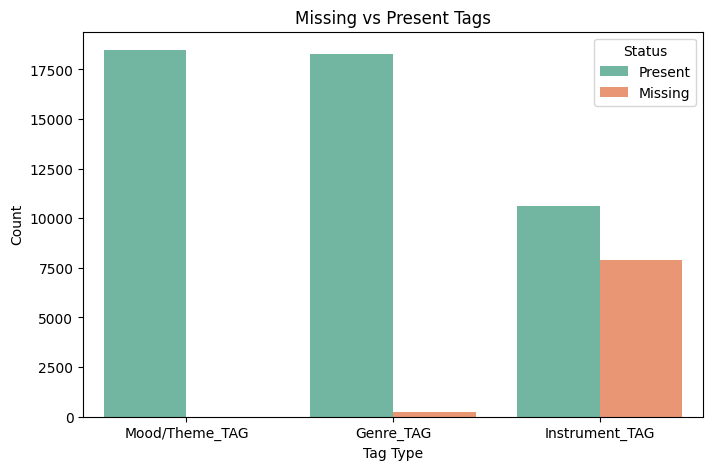

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18568\2780951232.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=count_df, x="Tag Type", y="Tag Count", palette="Set3")


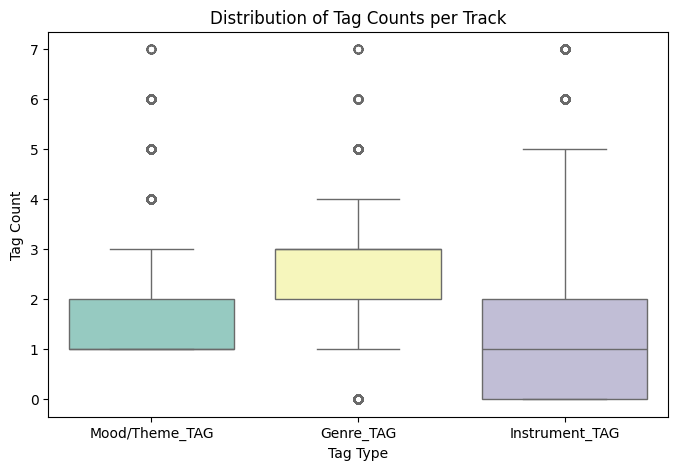

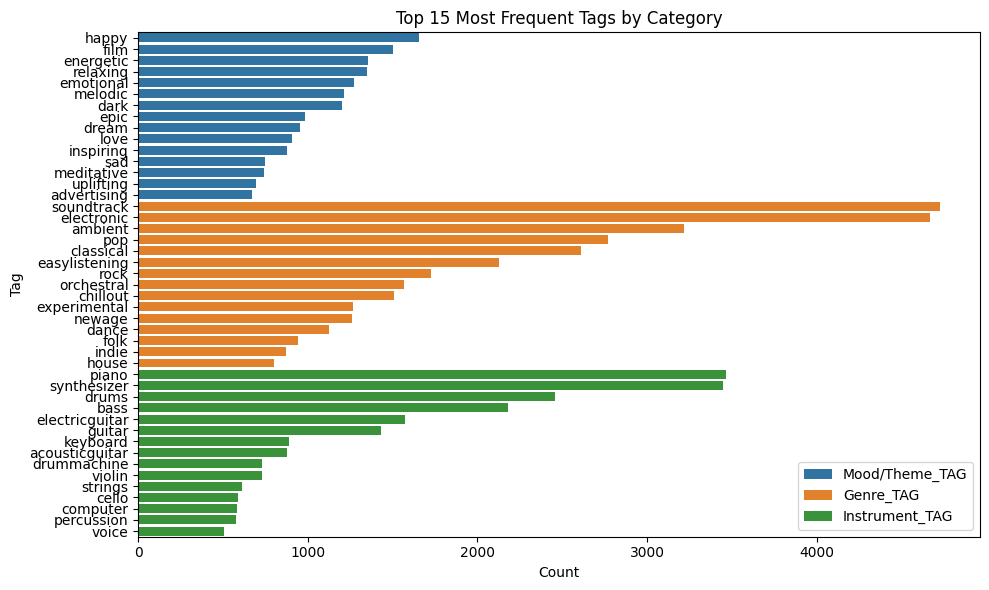

In [38]:
# -----------------------------
# 1. MISSING vs NON-MISSING TAGS
# -----------------------------
missing_stats = df_mood_genre_instr[["Mood/Theme_TAG", "Genre_TAG", "Instrument_TAG"]].isnull().melt(
    var_name="Tag Type", value_name="Missing"
)
missing_stats["Status"] = missing_stats["Missing"].apply(lambda x: "Missing" if x else "Present")

plt.figure(figsize=(8, 5))
sns.countplot(data=missing_stats, x="Tag Type", hue="Status", palette="Set2")
plt.title("Missing vs Present Tags")
plt.ylabel("Count")
plt.show()

# -----------------------------
# 2. NUMBER OF TAGS PER ENTRY
# -----------------------------
def count_tags(tag_list):
    if isinstance(tag_list, list):
        return len(tag_list)
    return 0

for col in ["Mood/Theme_TAG", "Genre_TAG", "Instrument_TAG"]:
    df_mood_genre_instr[col + "_count"] = df_mood_genre_instr[col].apply(count_tags)

count_df = df_mood_genre_instr[["Mood/Theme_TAG_count", "Genre_TAG_count", "Instrument_TAG_count"]]
count_df = count_df.melt(var_name="Tag Type", value_name="Tag Count")
count_df["Tag Type"] = count_df["Tag Type"].str.replace("_count", "")

plt.figure(figsize=(8, 5))
sns.boxplot(data=count_df, x="Tag Type", y="Tag Count", palette="Set3")
plt.title("Distribution of Tag Counts per Track")
plt.show()

# -----------------------------
# 3. MOST FREQUENT TAGS (TOP 15)
# -----------------------------
from collections import Counter

def flatten_column(col):
    return [tag for sublist in df_mood_genre_instr[col].dropna() for tag in sublist]

tag_stats = {}
for col in ["Mood/Theme_TAG", "Genre_TAG", "Instrument_TAG"]:
    tag_list = flatten_column(col)
    tag_counts = Counter(tag_list)
    tag_stats[col] = pd.DataFrame(tag_counts.items(), columns=["Tag", "Count"]).sort_values("Count", ascending=False).head(15)
    tag_stats[col]["Tag Type"] = col

all_tags = pd.concat(tag_stats.values())

plt.figure(figsize=(10, 6))
sns.barplot(data=all_tags, x="Count", y="Tag", hue="Tag Type", dodge=False)
plt.title("Top 15 Most Frequent Tags by Category")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

developer's exploratory notebook, I will wrap evrything up so it is pretty soon!!!